#Part I

A. Company: Tesla, Inc. Common Stock. Ticker Symbol is "TSLA"

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv("/Users/xikexin/Desktop/TSLA.csv", index_col='Date',  
parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-25,326.323334,336.206665,325.100006,332.673340,332.673340,68341200
2022-04-26,331.809998,333.333344,291.666656,292.140015,292.140015,136133700
2022-04-27,299.526672,306.000000,292.453339,293.836670,293.836670,76956300
2022-04-28,299.993347,300.000000,273.899994,292.503326,292.503326,124948500
2022-04-29,300.750000,311.466675,290.000000,290.253326,290.253326,88133100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-04-25 to 2023-04-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [5]:
df.index

DatetimeIndex(['2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-05-02', '2022-05-03', '2022-05-04',
               '2022-05-05', '2022-05-06',
               ...
               '2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13',
               '2023-04-14', '2023-04-17', '2023-04-18', '2023-04-19',
               '2023-04-20', '2023-04-21'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

D. The dataset is indexed by time values, because we use the code: index_col='Date', parse_dates=True.

In [6]:
df.index.max()
df.index.min()
df.index.argmax() 
df.index.argmin()

0

E. The results of max, min, argmax, and argmin represent: Timestamp('2023-04-21 00:00:00'); Timestamp('2022-04-25 00:00:00'); 249; 0

<Axes: xlabel='Date'>

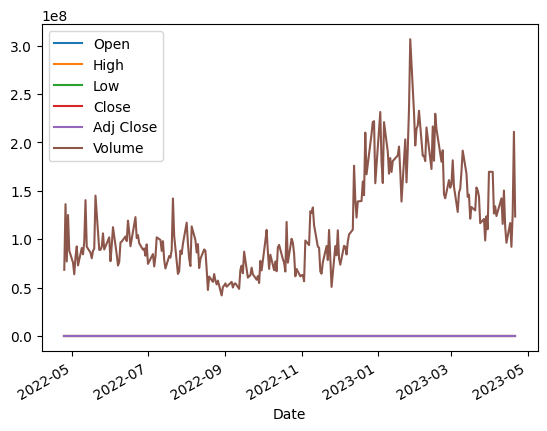

In [7]:
df.plot()

F.a. It's hard to explain because I only see two lines for volume and Adj close and the other data fails to show up. I think showing each variable separately would make the icons easier to understand.

Text(0.5, 1.0, 'Daily Close for †he Last Year')

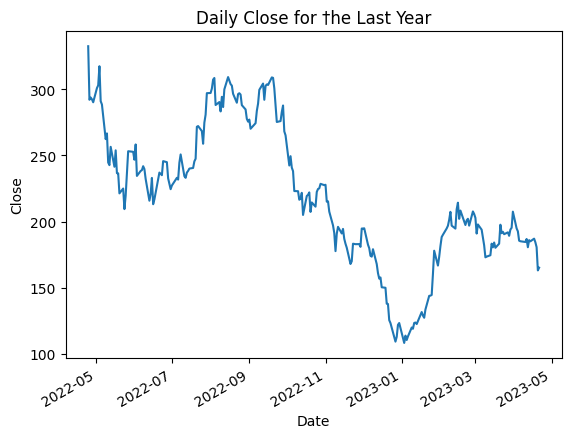

In [19]:
df['Close'].plot()
plt.ylabel('Close')
plt.title('Daily Close for †he Last Year')

F.b. The recent one-year closing price has been trending down overall, with a high in May '22 and a low produced in January '23. It has recently been trending down after a slight recovery and then down again. It b easy to understand because of the clear data and values.

Text(0.5, 1.0, 'Daily Close for March 2023')

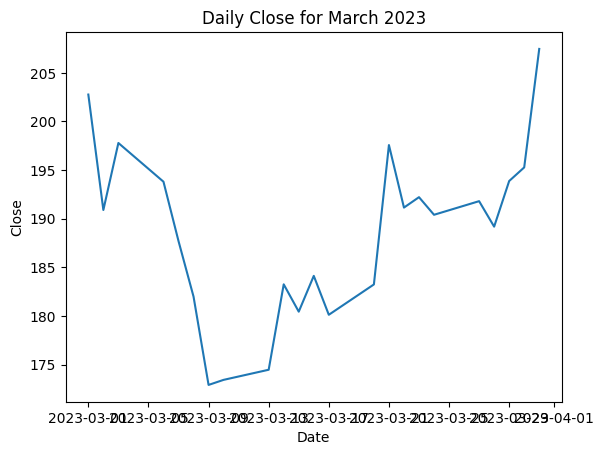

In [34]:
subset_month = df.loc['2023-03-01':'2023-03-31']

plt.plot(subset_month['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Daily Close for March 2023')

Text(0.5, 1.0, 'Daily Close for March 2023')

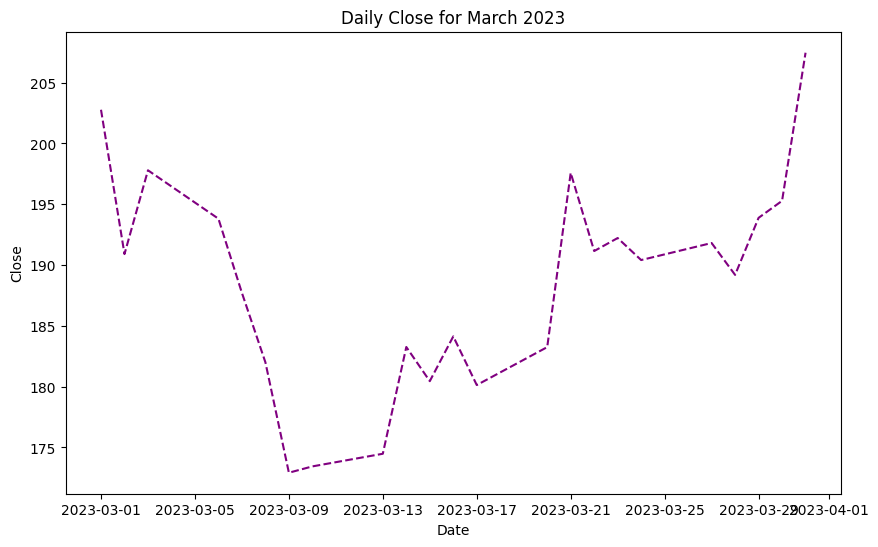

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(subset_month['Close'], color='purple', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Daily Closing Prices for March 2023')

Text(0.5, 1.0, 'Daily Closing Prices with 10-Period Moving Average')

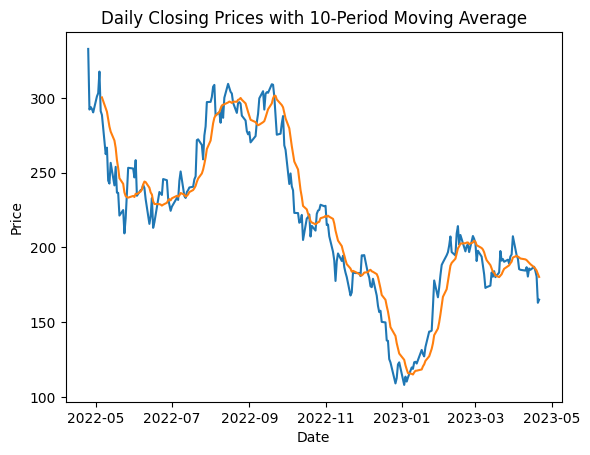

In [37]:
period_10 = df['Close'].rolling(10).mean()

plt.plot(df['Close'], label='Closing Prices')
plt.plot(period_10, label='10-Period Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Closing Prices with 10-Period Moving Average')
plt.legend()

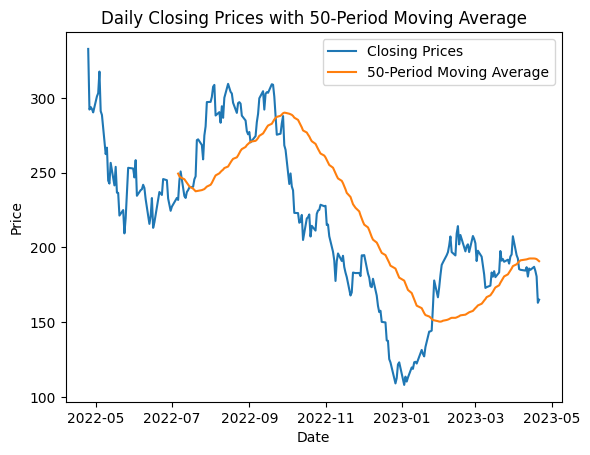

In [38]:
period_50 = df['Close'].rolling(50).mean()

plt.plot(df['Close'], label='Closing Prices')
plt.plot(period_50, label='50-Period Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Closing Prices with 50-Period Moving Average')
plt.legend()

G.c. These two moving average charts differ in the number of periods used to calculate the moving average, with the 10-period average being more variable and the 50-period average being smoother but with a higher lag.

The advantage of using the 10-period moving average is that it is more responsive to recent price changes and has less lag. It is more suitable for short-term trading or identifying short-term trends in the market. But the disadvantages are: more susceptible to noise and volatility and may provide false signals in volatile markets.

The advantages of using a 50-period moving average include: more smooth and stable, more suitable for long term trading or identifying long term trends in the market. Less susceptible to noise and volatility. But disadvantages include: slower response to recent price changes and more lag. May miss short-term trading opportunities.

In [ ]:
df2 = df.resample('M').mean()['Close']
df2.plot()

Text(0.5, 1.0, 'Quarterly Mean Closing Prices')

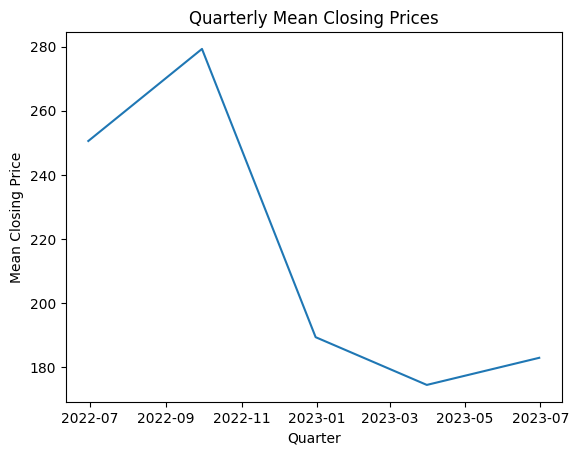

In [39]:
df_resample = df.resample('Q').mean()

plt.plot(df_resample['Close'])
plt.xlabel('Quarter')
plt.ylabel('Mean Closing Price')
plt.title('Quarterly Mean Closing Prices')

H. Resampling time series is useful in situations where the raw data is too granular or noisy, making it difficult to identify long-term trends or patterns. For example, in financial markets, daily price fluctuations may be too erratic to identify long-term trends or patterns. Resampling the data to weekly or monthly averages may help investors make more informed decisions about long-term investment strategies.

#Part II

In [41]:
df_2 = pd.read_csv("/Users/xikexin/Desktop/schwab_ads.csv")
df_2.head()

,Web,Bus_Stop,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [43]:
df_2 = df_2.assign(Spending = df_2.Web + df_2.Bus_Stop + df_2.Newspaper)
df_2.head()

,Web,Bus_Stop,Newspaper,Sales,spending,Spending
0,230.1,37.8,69.2,22.1,337.1,337.1
1,44.5,39.3,45.1,10.4,128.9,128.9
2,17.2,45.9,69.3,12.0,132.4,132.4
3,151.5,41.3,58.5,16.5,251.3,251.3
4,180.8,10.8,58.4,17.9,250.0,250.0


In [44]:
df_2['Spending'].corr(df_2['Sales'])

0.9249170062499313

b.i. The correlation between these variables is 0.9249.

b.ii. The correlation coefficient was 0.9249, indicating a strong positive relationship between total marketing expenditures and sales. This means that as total marketing expenditures increase, sales tend to increase as well.

But even if there is a strong relationship between total marketing expenditures and sales, we cannot infer that more advertising expenditures will directly lead to more sales. There may be other factors that influence sales, such as the effects of market competition, consumer preferences, product quality, etc.

In [45]:
df_2[['Web', 'Bus_Stop', 'Newspaper']].corr()

,Web,Bus_Stop,Newspaper
Web,1.000000,0.054809,0.056648
Bus_Stop,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


c. These correlations are not so high that we are able to use them in a linear model.

In [49]:
liner_model = smf.ols('Sales ~ Web + Bus_Stop + Newspaper', data = df_2).fit()
liner_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           8.13e-99
Time:                        19:22:26   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
Web            0.0544      0.001     39.592      0.000       0.052       0.057
Bus_Stop       0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d.i. The p-value of the F-Statistic is 8.13e-99, which means that our choice of input variables is very significant and will have a large impact on the outcome variable.

d.ii. The p-values for both bus spending and web ad spending are zero, implying that they both have a significant effect on the outcome variable, but the p-value for newspape is 0.94, which means that this variable does not contribute significantly to explaining the outcome variable, so we should remove this variable.

In [50]:
liner_model2 = smf.ols('Sales ~ Web + Bus_Stop + Web:Bus_Stop', data = df_2).fit()
liner_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     694.7
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          3.90e-104
Time:                        21:05:44   Log-Likelihood:                -370.83
No. Observations:                 200   AIC:                             749.7
Df Residuals:                     196   BIC:                             762.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.1926      0.410     15.101      0.000       5.384       7.001
Web              0.0436      0.002     17.512      0.000       0.039       0.048
Bus_Stop         0.0423      0.015      2.869      0.005       0.013       0.071
Web:Bus_Stop     0.0004   8.67e-05      5.110      0.000       0.000       0.001
==============================================================================
Omnibus:                        8.006   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               10.847
Skew:                          -0.258   Prob(JB):                      0.00441
Kurtosis:                       4.017   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

e.i. The p-values of these predictors are all zero or close to zero.

In [66]:
liner_model3 = smf.ols('Sales ~ Web + Bus_Stop', data=df_2).fit()
r_squared = liner_model3.rsquared
r_squared

0.9025896186081139

e.ii. Since the R-squared value of the model with the interaction term (0.914) was higher than the R-squared value of the model without the interaction term (0.903), this suggests that including the interaction term can better explain the variability of the dependent variable. This result suggests that the interaction term is a useful variable and should be included in the model.

In [68]:
liner_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.39e-100
Time:                        21:52:09   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
Web            0.0544      0.001     39.726      0.000       0.052       0.057
Bus_Stop       0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Sales = 4.6309+0.0544*220+0.1072*30 = 19.8159

e.iii. This marketer should expect to see the sales outcome is 19.81

e.iv. The coefficient of 0.0004 based on the interaction term Web:Bus_Stop indicates that the effect of bus stop spending on the outcome variable is not significantly influenced by the level of online advertising spending. In other words, the effect of the combination of bus stop and online advertising expenditures on the outcome variable may not exceed the effect of each marketing channel individually. When comparing the two, bus stop spending would bring about greater variation in sales outcomes.

f. An example of an interaction term in the model is to predict customer loyalty for an online shopping platform. A customer's frequency of purchase and the amount spent both indicate their loyalty to the platform, in this case the interaction term is the product of the customer's frequency of purchase and the amount spent by the customer.
The effect of the interaction term on customer loyalty is positive if it shows that customers who buy frequently and spend a lot of money are more likely to be loyal. And when the effect of the interaction is negative s, it indicates that customers who buy frequently but do not spend a lot of money are less likely to be loyal, or customers who spend a lot of money at once but not as often.
I think it is important to include this interaction term for analysis. By analyzing the interaction effect, the platform can determine which customers are most likely to be loyal.

#Part III

Based on these 225 students' assignments, I can think of a great way to do this: the assignments could be randomly assigned to students to grade, so that each person could be given three random assignments. This way each person's assignment could be corrected three times, get three scores, and the final score for that assignment would be the average score. I can't think of a way to incorporate other peers into the system at the moment, but the advantage of this method is that students can deepen their understanding of the problem, consolidate the relevant body of knowledge, and better yet, have the opportunity to see multiple solutions to a problem and generate new thinking by correcting their assignments.